In [1]:
import pandas as pd
import numpy as np

In [2]:
r1 = pd.read_csv('/opt/ml/output-3.csv')
r2 = pd.read_csv('/opt/ml/output-4.csv')
r3 = pd.read_csv('/opt/ml/output-5.csv')

In [3]:
def mapping_age(x):
    if x%3 == 0:
        return 0
    elif x%3 == 1:
        return 1
    return 2
    
def mapping_gender(x):
    if (x//3)%2 == 0:
        return 0
    return 1

def mapping_mask(x):
    if x//6 == 0:
        return 0
    elif x//6 == 1:
        return 1
    return 2

In [4]:
r1['age'] = r1['ans'].apply(mapping_age)
r2['age'] = r2['ans'].apply(mapping_age)
r3['age'] = r3['ans'].apply(mapping_age)

In [5]:
r1['gender'] = r1['ans'].apply(mapping_gender)
r2['gender'] = r2['ans'].apply(mapping_gender)
r3['gender'] = r3['ans'].apply(mapping_gender)

In [6]:
r1['mask'] = r1['ans'].apply(mapping_mask)
r2['mask'] = r2['ans'].apply(mapping_mask)
r3['mask'] = r3['ans'].apply(mapping_mask)

In [7]:
r1.head()

,ImageID,ans,age,gender,mask
0,cbc5c6e168e63498590db46022617123f1fe1268.jpg,13,1,0,2
1,0e72482bf56b3581c081f7da2a6180b8792c7089.jpg,1,1,0,0
2,b549040c49190cedc41327748aeb197c1670f14d.jpg,13,1,0,2
3,4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg,13,1,0,2
4,248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg,12,0,0,2


In [18]:
data = r3

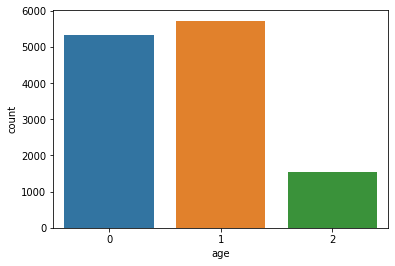

In [19]:
import seaborn as sns
sns.countplot(x='age', data=data)

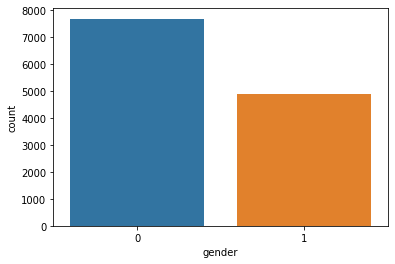

In [20]:
sns.countplot(x='gender', data=data)

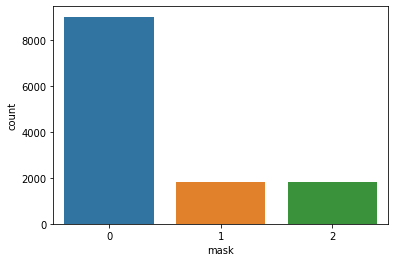

In [21]:
sns.countplot(x='mask', data=data)

In [45]:
from scipy.stats import mode
from collections import Counter

b1, b2, b3 = [1, 1], [2, 1], [2, 3]
a = []

TypeError: 'Counter' object is not callable

In [48]:
def frequent(x1, x2, x3):
    x1, x2, x3 = x1.tolist(), x2.tolist(), x3.tolist()
    result = []
    for a, b, c in zip(x1, x2, x3):
        result.append(Counter([a, b, c]).most_common()[0][0])
    return result

In [53]:
mask_vote = frequent(r1['mask'], r2['mask'], r3['mask'])

In [54]:
len(mask_vote), mask_vote[6]

(12600, 1)

In [55]:
age_vote = frequent(r1['age'], r2['age'], r3['age'])

In [56]:
gender_vote = frequent(r1['gender'], r2['gender'], r3['gender'])

In [57]:
len(age_vote), len(gender_vote)

(12600, 12600)

In [58]:
mask = np.array(mask_vote)
age = np.array(age_vote)
gender = np.array(gender_vote)

In [59]:
type(mask), len(mask)

(numpy.ndarray, 12600)

In [60]:
submission = pd.read_csv('/opt/ml/input/data/eval/info.csv')

In [61]:
result = mask*6 + age + gender*3

In [62]:
result = result.tolist()

In [63]:
submission['ans'] = result

In [64]:
submission.head()

,ImageID,ans
0,cbc5c6e168e63498590db46022617123f1fe1268.jpg,13
1,0e72482bf56b3581c081f7da2a6180b8792c7089.jpg,1
2,b549040c49190cedc41327748aeb197c1670f14d.jpg,13
3,4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg,13
4,248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg,12


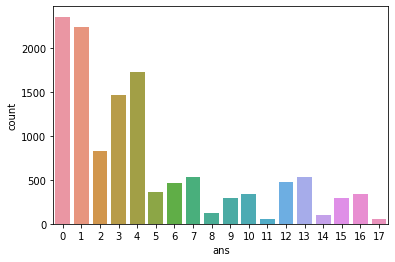

In [65]:
sns.countplot(x='ans', data=submission)

In [66]:
len(submission)

12600

In [67]:
submission.head()

,ImageID,ans
0,cbc5c6e168e63498590db46022617123f1fe1268.jpg,13
1,0e72482bf56b3581c081f7da2a6180b8792c7089.jpg,1
2,b549040c49190cedc41327748aeb197c1670f14d.jpg,13
3,4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg,13
4,248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg,12


In [68]:
submission.to_csv('/opt/ml/submission.csv', index=False)